# Frequentist Inference Case Study - Part A 

## 1. Learning objectives

Welcome to part A of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. Frequentist inference is the process of deriving conclusions about an underlying distribution via the observation of data. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

## Prerequisites

To be able to complete this notebook, you are expected to have a basic understanding of:
* what a random variable is (p.400 of Professor Spiegelhalter's *The Art of Statistics, hereinafter AoS*)
* what a population, and a population distribution, are (p. 397 of *AoS*)
* a high-level sense of what the normal distribution is (p. 394 of *AoS*)
* what the t-statistic is (p. 275 of *AoS*)

Happily, these should all be concepts with which you are reasonably familiar after having read ten chapters of Professor Spiegelhalter's book, *The Art of Statistics*.

We'll try to relate the concepts in this case study back to page numbers in *The Art of Statistics* so that you can focus on the Python aspects of this case study. The second part (part B) of this case study will involve another, more real-world application of these tools. 

For this notebook, we will use data sampled from a known normal distribution. This allows us to compare our results with theoretical expectations.

## 2. An introduction to sampling from the normal distribution

First, let's explore the ways we can generate the normal distribution. While there's a fair amount of interest in [sklearn](https://scikit-learn.org/stable/) within the machine learning community, you're likely to have heard of [scipy](https://docs.scipy.org/doc/scipy-0.15.1/reference/index.html) if you're coming from the sciences. For this assignment, you'll use [scipy.stats](https://docs.scipy.org/doc/scipy-0.15.1/reference/tutorial/stats.html) to complete your work. 

This assignment will require some digging around and getting your hands dirty (your learning is maximized that way)! You should have the research skills and the tenacity to do these tasks independently, but if you struggle, reach out to your immediate community and your mentor for help.

In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import matplotlib.pyplot as plt

__Q1:__ Call up the documentation for the `norm` function imported above. (Hint: that documentation is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)). What is the second listed method?

In [2]:
print(
    '\n'.join(norm.__doc__.split('\n')[:20])
    + '\n\n    ...'
)

A normal continuous random variable.

    The location (``loc``) keyword specifies the mean.
    The scale (``scale``) keyword specifies the standard deviation.

    As an instance of the `rv_continuous` class, `norm` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)

    ...


__A:__ 

The second listed method is `pdf`, short for probability density function.

__Q2:__ Use the method that generates random variates to draw five samples from the standard normal distribution. 

__A:__

In [3]:
np.random.seed(47)
# draw five samples here
norm_sample = norm.rvs(size=5)
print(norm_sample)

[-0.84800948  1.30590636  0.92420797  0.6404118  -1.05473698]


__Q3:__ What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution. If you want a reminder of the properties of this distribution, check out p. 85 of *AoS*. 

__A:__

In [4]:
# Calculate and print the mean
norm_sample_mean = np.mean(norm_sample)
print(norm_sample_mean)

0.19355593334131074


__Q4:__ What is the standard deviation of these numbers? Calculate this manually here as $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$ (This is just the definition of **standard deviation** given by Professor Spiegelhalter on p.403 of *AoS*). Hint: np.sqrt() and np.sum() will be useful here and remember that numPy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

__A:__

In [5]:
# calculate std dev using n as denominator
norm_sample_std_1 = np.sqrt(
    sum((norm_sample - norm_sample_mean)**2)
    / len(norm_sample)
)
# check math
assert norm_sample_std_1 == np.std(norm_sample)
print(norm_sample_std_1)

0.9606195639478641


Here we have calculated the actual standard deviation of a small data set (of size 5). But in this case, this small data set is actually a sample from our larger (infinite) population. In this case, the population is infinite because we could keep drawing our normal random variates until our computers die! 

In general, the sample mean we calculate will not be equal to the population mean (as we saw above). A consequence of this is that the sum of squares of the deviations from the _population_ mean will be bigger than the sum of squares of the deviations from the _sample_ mean. In other words, the sum of squares of the deviations from the _sample_ mean is too small to give an unbiased estimate of the _population_ variance. An example of this effect is given [here](https://en.wikipedia.org/wiki/Bessel%27s_correction#Source_of_bias). Scaling our estimate of the variance by the factor $n/(n-1)$ gives an unbiased estimator of the population variance. This factor is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). The consequence of this is that the $n$ in the denominator is replaced by $n-1$.

You can see Bessel's correction reflected in Professor Spiegelhalter's definition of **variance** on p. 405 of *AoS*.

__Q5:__ If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.

__A:__

In [6]:
# calculate std dev using n - 1 as denominator
norm_sample_std_2 = np.sqrt(
    sum((norm_sample - norm_sample_mean)**2)
    / (len(norm_sample) - 1)
)
# check math
assert norm_sample_std_2 == np.std(norm_sample, ddof=1)
print(norm_sample_std_2)

1.0740053227518152


__Q6:__ Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

__A:__

By default, numpy's std function calculates and returns the standard deviation of a population, as calculated in Q4.

In [7]:
print(f'standard deviation (n):\n{np.std(norm_sample)}')

standard deviation (n):
0.9606195639478641


__Q7:__ Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.

__A:__

In [8]:
print(
    f'from Parameters section of np.std docstring:\n{79*"-"}\n'
    + np.std.__doc__[
        np.std.__doc__.index('ddof'):
        np.std.__doc__.index('keepdims')
    ]
)


from Parameters section of np.std docstring:
-------------------------------------------------------------------------------
ddof : int, optional
        Means Delta Degrees of Freedom.  The divisor used in calculations
        is ``N - ddof``, where ``N`` represents the number of elements.
        By default `ddof` is zero.
    


The `ddof` (Delta Degrees of Freedom) keyword argument is used to set the divisor in the standard deviation equation used by the `np.std()` function, such that `divisor = n - ddof`. To return an unbiased estimator of population variance using a sample of that population, pass `ddof=1`.

In [9]:
# verify this process produces the expected result
assert norm_sample_std_2 == np.std(norm_sample, ddof=1)
print(
    f'standard deviation (n - 1):\n{np.std(norm_sample, ddof=1)}'
)

standard deviation (n - 1):
1.0740053227518152


### Summary of section

In this section, you've been introduced to the scipy.stats package and used it to draw a small sample from the standard normal distribution. You've calculated the average (the mean) of this sample and seen that this is not exactly equal to the expected population parameter (which we know because we're generating the random variates from a specific, known distribution). You've been introduced to two ways of calculating the standard deviation; one uses $n$ in the denominator and the other uses $n-1$ (Bessel's correction). You've also seen which of these calculations np.std() performs by default and how to get it to generate the other.

You use $n$ as the denominator if you want to calculate the standard deviation of a sequence of numbers. You use $n-1$ if you are using this sequence of numbers to estimate the population parameter. This brings us to some terminology that can be a little confusing.

The population parameter is traditionally written as $\sigma$ and the sample statistic as $s$. Rather unhelpfully, $s$ is also called the sample standard deviation (using $n-1$) whereas the standard deviation of the sample uses $n$. That's right, we have the sample standard deviation and the standard deviation of the sample and they're not the same thing!

The sample standard deviation
\begin{equation}
s = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}} \approx \sigma,
\end{equation}
is our best (unbiased) estimate of the population parameter ($\sigma$).

If your dataset _is_ your entire population, you simply want to calculate the population parameter, $\sigma$, via
\begin{equation}
\sigma = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}
\end{equation}
as you have complete, full knowledge of your population. In other words, your sample _is_ your population. It's worth noting that we're dealing with what Professor Spiegehalter describes on p. 92 of *AoS* as a **metaphorical population**: we have all the data, and we act as if the data-point is taken from a population at random. We can think of this population as an imaginary space of possibilities. 

If, however, you have sampled _from_ your population, you only have partial knowledge of the state of your population. In this case, the standard deviation of your sample is not an unbiased estimate of the standard deviation of the population, in which case you seek to estimate that population parameter via the sample standard deviation, which uses the $n-1$ denominator.

Great work so far! Now let's dive deeper.

## 3. Sampling distributions

So far we've been dealing with the concept of taking a sample from a population to infer the population parameters. One statistic we calculated for a sample was the mean. As our samples will be expected to vary from one draw to another, so will our sample statistics. If we were to perform repeat draws of size $n$ and calculate the mean of each, we would expect to obtain a distribution of values. This is the sampling distribution of the mean. **The Central Limit Theorem (CLT)** tells us that such a distribution will approach a normal distribution as $n$ increases (the intuitions behind the CLT are covered in full on p. 236 of *AoS*). For the sampling distribution of the mean, the standard deviation of this distribution is given by

\begin{equation}
\sigma_{mean} = \frac{\sigma}{\sqrt n}
\end{equation}

where $\sigma_{mean}$ is the standard deviation of the sampling distribution of the mean and $\sigma$ is the standard deviation of the population (the population parameter).

This is important because typically we are dealing with samples from populations and all we know about the population is what we see in the sample. From this sample, we want to make inferences about the population. We may do this, for example, by looking at the histogram of the values and by calculating the mean and standard deviation (as estimates of the population parameters), and so we are intrinsically interested in how these quantities vary across samples. 

In other words, now that we've taken one sample of size $n$ and made some claims about the general population, what if we were to take another sample of size $n$? Would we get the same result? Would we make the same claims about the general population? This brings us to a fundamental question: _when we make some inference about a population based on our sample, how confident can we be that we've got it 'right'?_

We need to think about **estimates and confidence intervals**: those concepts covered in Chapter 7, p. 189, of *AoS*.

Now, the standard normal distribution (with its variance equal to its standard deviation of one) would not be a great illustration of a key point. Instead, let's imagine we live in a town of 50,000 people and we know the height of everyone in this town. We will have 50,000 numbers that tell us everything about our population. We'll simulate these numbers now and put ourselves in one particular town, called 'town 47', where the population mean height is 172 cm and population standard deviation is 5 cm.

In [10]:
np.random.seed(47)
pop_heights = norm.rvs(172, 5, size=50000)

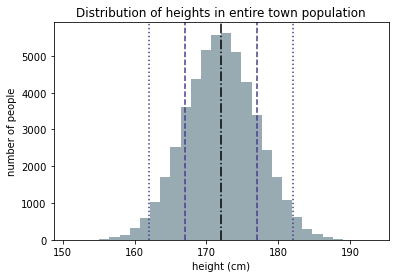

In [11]:
_ = plt.hist(pop_heights, bins=30, color='#98abb3')
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='black', linestyle='-.')
_ = plt.axvline(172+5, color='#483D8B', linestyle='--')
_ = plt.axvline(172-5, color='#483D8B', linestyle='--')
_ = plt.axvline(172+10, color='#483D8B', linestyle=':')
_ = plt.axvline(172-10, color='#483D8B', linestyle=':')

Now, 50,000 people is rather a lot to chase after with a tape measure. If all you want to know is the average height of the townsfolk, then can you just go out and measure a sample to get a pretty good estimate of the average height?

In [12]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

Let's say you go out one day and randomly sample 10 people to measure.

In [13]:
np.random.seed(47)
daily_sample1 = townsfolk_sampler(10)

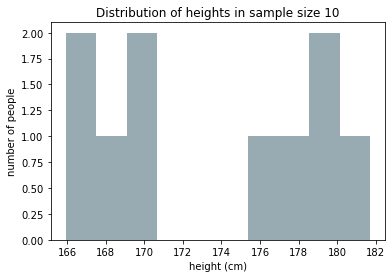

In [14]:
_ = plt.hist(daily_sample1, bins=10, color='#98ABB3')
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')

The sample distribution doesn't resemble what we take the population distribution to be. What do we get for the mean?

In [15]:
np.mean(daily_sample1)

173.47911444163503

And if we went out and repeated this experiment?

In [16]:
daily_sample2 = townsfolk_sampler(10)

In [17]:
np.mean(daily_sample2)

173.7317666636263

__Q8:__ Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

__A:__

Define functions for common tasks in the next series of questions.<br><br>
`plot_sample_dist_of_mean()` - plot a histogram from a series of sample means<br>
`simulate_year_of_samples()`- return sequence of samples and sequence of sample means. plot sampling distribution of mean<br>
`print_summary` - print summary statistics for a dataset

In [18]:
def plot_sample_dist_of_mean(
        sample_means: list[float], sample_size:int, x_label: str,
        x_units: str, title: str) -> None:
    '''For a given sequence of sample means, plot a histogram to
    facilitate visualization of distrubtion.
    
    Arguments:
    sample_means -- sequence of means of samples
    sample_size -- size (n) of each sample
    x_label -- measurement type of samples
    x_units -- measurement unit of samples
    title -- title for resultant plot
    '''
    means_mean = np.mean(sample_means)
    means_std = np.std(sample_means, ddof=1)
    _ = plt.figure(figsize = (12, 6))
    _ = plt.hist(sample_means, bins=20, color='#98ABB3')
    _ = plt.xlabel(f'Mean {x_label.lower()} of sample ({x_units})')
    _ = plt.ylabel('Number of samples')
    _ = plt.axvline(
        means_mean, color='black', linestyle='-.',
        label = f'Mean (≈ {means_mean:.2f})'
    )
    _ = plt.axvline(
        means_mean + means_std, color='#483D8B', 
        label = f'±1 std deviation (≈ {means_std:.2f})', linestyle='--'
    )
    _ = plt.axvline(
        means_mean - means_std, color='#483D8B', 
        linestyle='--'
    )
    _ = plt.axvline(
        means_mean + 2 * means_std, linestyle=':', color='#483D8B',
        label='±2 std deviations'
    )
    _ = plt.axvline(
        means_mean - 2 * means_std, linestyle=':', color='#483D8B'
    )
    _ = plt.title(f'{title}\nSample size = {sample_size}')
    _ = plt.legend()
    plt.show()

def simulate_year_of_samples(
        sample_size:int, sample_func: callable = townsfolk_sampler,
        random_seed: int = 47, show_dist_plot: bool = True,
        var_name: str = 'height', var_units: str = 'cm'
        ) -> tuple[list[float]]:
    '''Return a tuple of lists, with the first containing the values of 
    365 samples of size 'sample_size' as returned by sample_func, and the
    second containing the means of those samples.
    
    Arguments:
    sample_size -- size of sample (n)
    sample_func -- function returning a sequence of n numeric values
    random_seed -- seed for np.random.seed
    show_dist_plot -- if true, plot the sampling distribution of the mean
    '''
    np.random.seed(random_seed)
    year_of_samples = [sample_func(sample_size) for day in range(365)]
    sample_means = [np.mean(sample) for sample in year_of_samples]
    if show_dist_plot:
        plot_sample_dist_of_mean(
            sample_means, sample_size, var_name, var_units,
            f'Distribution of mean {var_name} for 365 simulated samples'
        )
    return (year_of_samples, sample_means)

def print_summary(
        data: list[float], label:str = '', is_sample: bool=True
        ) -> None:
    '''Print summary statistics for a dataset.
    '''
    summary = {name: f'{round(val, 3):.3f}' for name, val in {
        'mean': np.mean(data),
        'standard deviation': np.std(data, ddof=int(is_sample))
    }.items()}
    if label:
        print(label)
        print(79*'_')
    max_len = max([len(val[:val.index('.')]) for val in summary.values()])
    for name, val in summary.items():
        print(
            f'{name.ljust(30)}'
            + f'≈ {val[:val.index(".")].rjust(max_len)}'
            + f'{val[val.index("."):]}'
        )


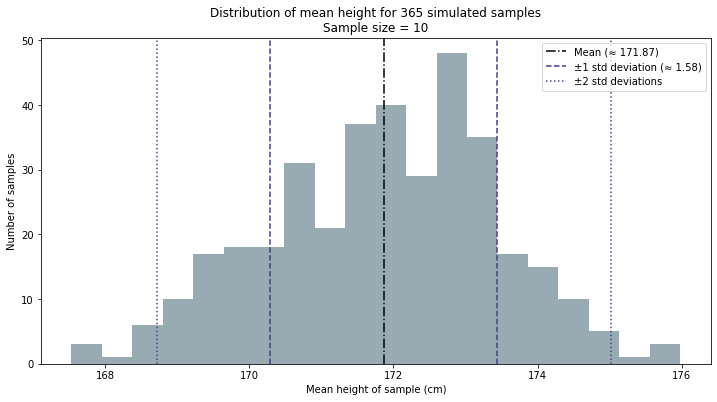

In [19]:
# take your samples here
sim_samples_n_10, sim_sample_means_n_10 = (
    simulate_year_of_samples(10)
)

The above is the distribution of the means of samples of size 10 taken from our population. The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation will be $\sigma / \sqrt n$, which, in this case, should be approximately 1.58.

__Q9:__ Verify the above results from the CLT.

__A:__

In [20]:
stdv_sample_means_n_10 = np.std(sim_sample_means_n_10, ddof=1)
assert round(stdv_sample_means_n_10, 2) == 1.58
print(
    f'Standard deviation of sample means for 365 samples '
    + f'at n = 10:\n≈ {round(stdv_sample_means_n_10, 3):.3f}'
)

Standard deviation of sample means for 365 samples at n = 10:
≈ 1.578


In [21]:
print_summary(
    sim_sample_means_n_10, 
    'Summary: 365 Simulated Sample Means (n = 10)'
)

Summary: 365 Simulated Sample Means (n = 10)
_______________________________________________________________________________
mean                          ≈ 171.866
standard deviation            ≈   1.578


Remember, in this instance, we knew our population parameters, that the average height really is 172 cm and the standard deviation is 5 cm, and we see some of our daily estimates of the population mean were as low as around 168 and some as high as 176.

__Q10:__ Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year)! Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

__A:__

I would expect a larger sample size to yield a narrower distribution of sample means.

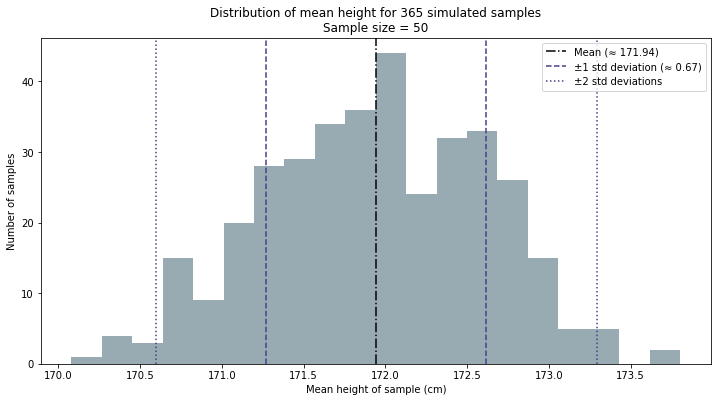

In [22]:
# calculate daily means from the larger sample size here
sim_samples_n_50, sim_sample_means_n_50 = (
    simulate_year_of_samples(50)
)

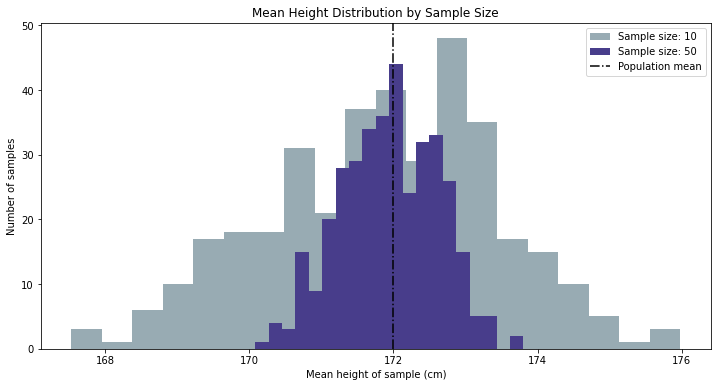

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
for sample_means, _color, size in [
        (sim_sample_means_n_10, '#98ABB3', 10), 
        (sim_sample_means_n_50, '#483D8B', 50)]:
    _ = ax.hist(
        sample_means, bins=20, label=f'Sample size: {size}', color=_color
    )
_ = ax.set_ylabel('Number of samples')
_ = ax.set_xlabel('Mean height of sample (cm)')
_ = ax.set_title('Mean Height Distribution by Sample Size')
_ = plt.axvline(172, label='Population mean', color='black', linestyle ='-.')
_ = plt.legend()
plt.show();

In [24]:
stdv_sample_means_n_50 = np.std(sim_sample_means_n_50, ddof=1)
assert stdv_sample_means_n_10 > stdv_sample_means_n_50
print(
    f'Standard deviation of sample means for 365 samples '
    + f'at n = 50:\n≈ {round(stdv_sample_means_n_50, 3)}'
)

Standard deviation of sample means for 365 samples at n = 50:
≈ 0.675


In [25]:
print_summary(
    sim_sample_means_n_50, 
    'Summary: 365 Simulated Sample Means (n = 50)'
)

Summary: 365 Simulated Sample Means (n = 50)
_______________________________________________________________________________
mean                          ≈ 171.944
standard deviation            ≈   0.675


***

What we've seen so far, then, is that we can estimate population parameters from a sample from the population, and that samples have their own distributions. Furthermore, the larger the sample size, the narrower are those sampling distributions.

### Normally testing time!

All of the above is well and good. We've been sampling from a population we know is normally distributed, we've come to understand when to use $n$ and when to use $n-1$ in the denominator to calculate the spread of a distribution, and we've  seen the Central Limit Theorem in action for a sampling distribution. All seems very well behaved in Frequentist land. But, well, why should we really care?

Remember, we rarely (if ever) actually know our population parameters but we still have to estimate them somehow. If we want to make inferences to conclusions like "this observation is unusual" or "my population mean has changed" then we need to have some idea of what the underlying distribution is so we can calculate relevant probabilities. In frequentist inference, we use the formulae above to deduce these population parameters. Take a moment in the next part of this assignment to refresh your understanding of how these probabilities work.

Recall some basic properties of the standard normal distribution, such as that about 68% of observations are within plus or minus 1 standard deviation of the mean. Check out the precise definition of a normal distribution on p. 394 of *AoS*. 

__Q11:__ Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

__A:__

The standard normal distribution has a mean of 0 and a standard deviation of 1. Below, a plot illustrates the cumulative distribution function at x = 1, shading the region bounded by the standard normal probability density function and the x axis where x <= 1. The value of the cumulative distribution function `cdf(x)` at `x = 1` equals the area of the shaded region.

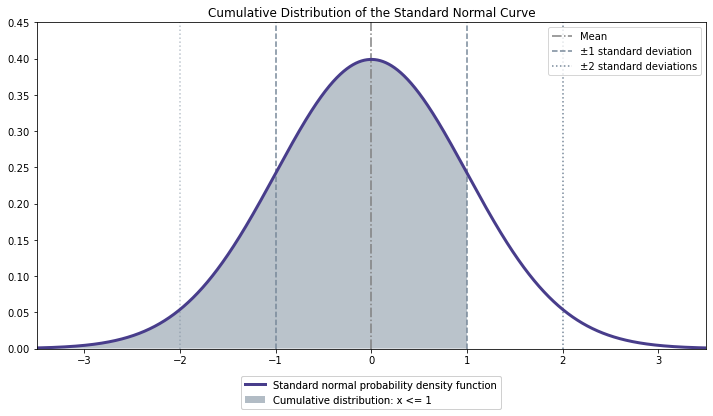

In [26]:
norm_x = np.linspace(norm.ppf(0.0001), norm.ppf(0.9999), 100000)
norm_y = norm.pdf(norm_x)
fig, ax = plt.subplots(figsize=(12, 6))
norm_fill = ax.fill_between(
    norm_x, norm_y, where=(norm_x <= 1), facecolor='#778899', alpha=0.5,
    label='Cumulative distribution: x <= 1'
)
l1 = ax.axvline(0, label='Mean', color='gray', linestyle='-.')
l2 = ax.axvline(1, label='±1 standard deviation', color='#778899', linestyle='--')
l3 = ax.axvline(2, label='±2 standard deviations', color='#778899', linestyle=':')
_ = ax.axvline(-1, color='#778899', linestyle='--')
_ = ax.axvline(-2, color='#778899', linestyle=':', alpha=0.5)
_ = plt.xlim(-3.5, 3.5)
_ = plt.ylim(0, 0.45)
norm_pdf = ax.plot(
    norm_x, norm_y, color='#483D8B', lw=3,
    label='Standard normal probability density function'
)[0]

legend_1 = plt.legend(handles=[l1, l2, l3])
legend_2 = plt.legend(
    handles=[norm_pdf, norm_fill], 
    labels=[norm_pdf.get_label(), norm_fill.get_label()],
    bbox_to_anchor=(0.5, -0.2), loc='lower center'
)
ax.add_artist(legend_1)
ax.add_artist(legend_2)

plt.title('Cumulative Distribution of the Standard Normal Curve')
plt.show();

Approximate probability using known properties of the normal distribution: <br><br>
68% of values are between the mean and the standard deviation. 32% of values lie outside this boundary, with `x > 1` or `x < -1`. As indicated in the plot above, half of this 32%, the values for `x < -1`, are part of the shaded region. Dividing 32% by 2, the unshaded area under the probability density function, corresponding to values of `x > 1`, is 16%. Subtracting this from 100 provides an estimate of the shaded area in the plot above as a percentage of the total area between the x axis and the probability density function. Calculate a simple estimate of the cumulative distribution function in this manner.

In [27]:
simple_estimate = 1 - ((1 - 0.68) / 2)
print(f'{simple_estimate:.2f}')

0.84


Using the trapezoidal composite rule, approximate the value of the integral of the standard normal probability density function with respect to x over the interval from -∞ to 1.

In [28]:
norm_x_1 = [x for x in norm_x if x <= 1]
norm_y_1 = norm.pdf(norm_x_1)
approx_cdf = np.trapz(norm_y_1, norm_x_1)
print(approx_cdf)

0.8412307020189826


The probability of observing a value of 1 or less in a single observation from the standard normal distribution is approximately `0.841`, or `84.12%`.
***

Calculating this probability involved calculating the area under the curve from the value of 1 and below. To put it in mathematical terms, we need to *integrate* the probability density function. We could just add together the known areas of chunks (from -Inf to 0 and then 0 to $+\sigma$ in the example above). One way to do this is to look up tables (literally). Fortunately, scipy has this functionality built in with the cdf() function.

__Q12:__ Use the cdf() function to answer the question above again and verify you get the same answer.

__A:__

In [29]:
assert round(approx_cdf, 3) == round(norm.cdf(1), 3)
print(norm.cdf(1))

0.8413447460685429


__Q13:__ Using our knowledge of the population parameters for our townsfolks' heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.

__A:__

The probability of selecting an individual of height 177 cm or less from this population is the same as the probability of observing a value of 1 or less from the standard normal distribution (as calculated in `Q11` and `Q12`). 177 cm is 5 cm from the mean, and 5 cm is the standard deviation of this population.
<br><br>The value of the cumulative distribution function `f(x)` at `x = 177` for this distribution is the same as the value of the cumulative distribution function for the standard normal distribution `g(x)` at `x = 1`.
<br><br> I expect this value to be roughly `0.841`.

In [30]:
town_height_norm = norm(172, 5)
cdf_177 = town_height_norm.cdf(177)
print(cdf_177)

0.8413447460685429


__Q14:__ Turning this question around — suppose we randomly pick one person and measure their height and find they are 2.00 m tall. How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability.

__A:__

If the `pop_heights` array is supposed to represent the complete list of heights for the entire population of town 47, the probability of randomly selecting an individual of height 2 m or taller from this population is 0. There are no individuals in this population with a height greater than or equal to 200 cm.

In [31]:
pop_max_height = max(pop_heights)
pop_heights_prob_2m = len(
    [height for height in pop_heights if height >= 200]
)
print(
    f'If pop_heights is the complete list of heights for this population,\n'
    + f'the probability of selecting an individual 2m or taller is '
    + f'{pop_heights_prob_2m}. \n\n'
    + f'The height of the tallest individual in Town 47 is '
    + f'{pop_max_height:.2f} cm.'
)

If pop_heights is the complete list of heights for this population,
the probability of selecting an individual 2m or taller is 0. 

The height of the tallest individual in Town 47 is 193.22 cm.


Otherwise, I would expect this probability to be very low, given the difference between `200 cm` and the population mean relative to the population standard deviation. This difference, `200 - 172 = 28`, is greater than five times the standard deviation of this distribution.

The complementary cumulative distribution function `ccdf(x)` will return the probability of randomly drawing an individual of height `x` or greater. Below, a plot illustrates this concept using scipy's implementation of the survival function, `norm.sf()`, which is synonymous with the complementary cumulative distribution function. The red dot indicates the value of this function for `x = 200 cm`.

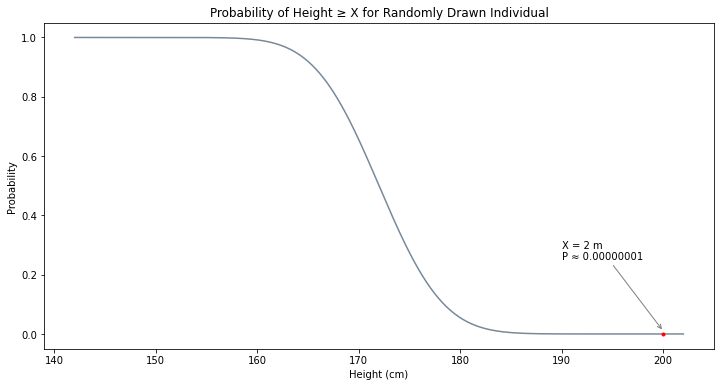

In [32]:
_x = np.arange(142, 202, 0.01)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(_x, town_height_norm.sf(_x), color='#778899')
plt.title('Probability of Height ≥ X for Randomly Drawn Individual')
ax.annotate(
    f'X = 2 m \nP ≈ {town_height_norm.sf(200):.8f}', xy=(200, 0.01), xytext=(190, 0.25),
    arrowprops={'arrowstyle':'->', 'color':'gray'}
)
plt.plot(200, town_height_norm.sf(200), marker='.', color='r')
plt.xlabel('Height (cm)')
plt.ylabel('Probability')
plt.show();

In [33]:
sf_200cm = town_height_norm.sf(200)
print(
    f'probability of drawing an individual 2m or taller:\n{79*"_"}\n'
    f'{"p-value:".ljust(15)} ≈ {sf_200cm}\n'
    f'{"percentage:".ljust(15)} ≈ {100 * town_height_norm.sf(200):.7f}%\n'
    f'{"1 in x:".ljust(15)} ≈ 1 in {int(1/sf_200cm//(1000000))} million'
)

probability of drawing an individual 2m or taller:
_______________________________________________________________________________
p-value:        ≈ 1.0717590258310887e-08
percentage:     ≈ 0.0000011%
1 in x:         ≈ 1 in 93 million


What we've just done is calculate the ***p-value*** of the observation of someone 2.00m tall (review *p*-values if you need to on p. 399 of *AoS*). We could calculate this probability by virtue of knowing the population parameters. We were then able to use the known properties of the relevant normal distribution to calculate the probability of observing a value at least as extreme as our test value.

We're about to come to a pinch, though. We've said a couple of times that we rarely, if ever, know the true population parameters; we have to estimate them from our sample and we cannot even begin to estimate the standard deviation from a single observation. 

This is very true and usually we have sample sizes larger than one. This means we can calculate the mean of the sample as our best estimate of the population mean and the standard deviation as our best estimate of the population standard deviation. 

In other words, we are now coming to deal with the sampling distributions we mentioned above as we are generally concerned with the properties of the sample means we obtain. 

Above, we highlighted one result from the CLT, whereby the sampling distribution (of the mean) becomes narrower and narrower with the square root of the sample size. We remind ourselves that another result from the CLT is that _even if the underlying population distribution is not normal, the sampling distribution will tend to become normal with sufficiently large sample size_. (**Check out p. 199 of AoS if you need to revise this**). This is the key driver for us 'requiring' a certain sample size, for example you may frequently see a minimum sample size of 30 stated in many places. In reality this is simply a rule of thumb; if the underlying distribution is approximately normal then your sampling distribution will already be pretty normal, but if the underlying distribution is heavily skewed then you'd want to increase your sample size.

__Q15:__ Let's now start from the position of knowing nothing about the heights of people in our town.
* Use the random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std (remember which denominator to use!)
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use norm.ppf()) Recall that the ***margin of error*** is mentioned on p. 189 of the *AoS* and discussed in depth in that chapter). 
* Calculate the 95% Confidence Interval of the mean (***confidence intervals*** are defined on p. 385 of *AoS*) 
* Does this interval include the true population mean?

__A:__

In [34]:
np.random.seed(47)
# take your sample now
town_sample_50 = townsfolk_sampler(50)

In [35]:
sample_50_mean = np.mean(town_sample_50)
print(
    f'estimated mean height of population ≈ {sample_50_mean:.3f} cm'
)

estimated mean height of population ≈ 172.782 cm


In [36]:
sample_50_std = np.std(town_sample_50, ddof=1)
print(
    f'estimated standard deviation of population ≈ {sample_50_std:.3f}'
)

estimated standard deviation of population ≈ 4.195


In [37]:
standard_error = sample_50_std / np.sqrt(50)
Z_95 = 1.96
z_margin_of_error_95 = Z_95 * standard_error
print(f'95% margin of error ≈ {z_margin_of_error_95:.3f}')

95% margin of error ≈ 1.163


In [38]:
z_confidence_interval_95 = [
    sample_50_mean - z_margin_of_error_95, 
    sample_50_mean + z_margin_of_error_95
]
print(
    f'(z) 95% confidence interval of mean: '
    + f'[{z_confidence_interval_95[0]:.2f}, '
    + f'{z_confidence_interval_95[1]:.2f}]'
)

(z) 95% confidence interval of mean: [171.62, 173.94]


__Q16:__ Above, we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

__A:__

In the question above, the mean, standard deviation, and shape of the population distribution are unknown. Sample size, assumed normality, and the availability of a population's mean and standard deviation are determining factors in the selection of critical values. Given the sample size, distribution is assumed to be normal. The use of the t distribution is more appropriate in this case, because population mean and standard deviation are unknown.

__Q17:__ Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

__A:__

A 95% confidence interval calculated using the t distribution will be wider than the confidence interval calculated using the critical z value.

In [39]:
n = 50
df = n - 1
ci = 0.95
tail_prob = (1 - ci) / 2
critical_t = t.ppf(tail_prob, df)
t_margin = critical_t * sample_50_std / np.sqrt(n)
t_confidence_interval_95 = [
    sample_50_mean + t_margin, sample_50_mean - t_margin
]
print(
    f'(t) 95% confidence interval of mean: '
    + f'[{t_confidence_interval_95[0]:.2f}, '
    + f'{t_confidence_interval_95[1]:.2f}]'
)

(t) 95% confidence interval of mean: [171.59, 173.97]


This is slightly wider than the previous confidence interval. This reflects the greater uncertainty given that we are estimating population parameters from a sample.

## 4. Learning outcomes

Having completed this project notebook, you now have hands-on experience:
* sampling and calculating probabilities from a normal distribution
* identifying the correct way to estimate the standard deviation of a population (the population parameter) from a sample
* with sampling distribution and now know how the Central Limit Theorem applies
* with how to calculate critical values and confidence intervals